In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

pd.set_option('display.max_rows', 10)

In [2]:
data = pd.read_csv('data.tsv', delimiter='\t', nrows=5000)
data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
4995,3720_2,0,Is this film a joke? Is it a comedy? Surely it...
4996,4229_10,1,Don't waste time reading my review. Go out and...
4997,8042_3,0,"The secret is...this movie blows. Sorry, but i..."
4998,9669_9,1,After reading the original play I thought it w...


In [3]:
data = data.drop('id', axis=1)
data

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
4995,0,Is this film a joke? Is it a comedy? Surely it...
4996,1,Don't waste time reading my review. Go out and...
4997,0,"The secret is...this movie blows. Sorry, but i..."
4998,1,After reading the original play I thought it w...


In [4]:
print('Sample review before clean:\n')
print(data['review'][9])

Sample review before clean:

<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."


In [5]:
# Clean function
def clean(text):
    # Remove html tags
    no_html = BeautifulSoup(text).get_text()

    # Convert to lowercase
    lower = no_html.lower()

    # Replace anything that is not a letter to a space, ignore case
    only_alphabet = re.sub('[^a-z]', ' ', lower)

    # Remove excessive spaces
    return re.sub('\s+', ' ', only_alphabet).strip()

In [6]:
# Clean review column
data['review'] = data['review'].apply(clean)

print('Cleaned data:')
data

Cleaned data:


,sentiment,review
0,1,with all this stuff going down at the moment w...
1,1,the classic war of the worlds by timothy hines...
2,0,the film starts with a manager nicholas bell g...
3,0,it must be assumed that those who praised this...
4,1,superbly trashy and wondrously unpretentious s...
...,...,...
4995,0,is this film a joke is it a comedy surely it i...
4996,1,don t waste time reading my review go out and ...
4997,0,the secret is this movie blows sorry but it ju...
4998,1,after reading the original play i thought it w...


In [7]:
print('Sample review after clean:\n')
print(data['review'][9])

Sample review after clean:

this movie is full of references like mad max ii the wild one and many others the ladybug s face it s a clear reference or tribute to peter lorre this movie is a masterpiece we ll talk much more about in the future


In [8]:
# Use review column as features
X = data['review']

# Use sentiment column as target
y = data['sentiment']

# Split data into 75% for training, 25%% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750,)
(1250,)
(3750,)
(1250,)


In [9]:
# Instantiate Count Vectorizer
cv = CountVectorizer()

# Learns vocabulary from training data
cv.fit(X_train)

vocabulary = cv.get_feature_names_out()

print('Vocabulary:')
print(vocabulary)

Vocabulary:
['aaa' 'aaaaatch' 'aaaahhhhhhh' ... 'zyuranger'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [10]:
# Create bag of words from training data using learned vocabulary
X_train_bow = cv.transform(X_train)

print('Bag of Words from training data:')
pd.DataFrame(X_train_bow.toarray(), columns=vocabulary)

Bag of Words from training data:


,aaa,aaaaatch,aaaahhhhhhh,aada,aag,aage,aakash,aamir,aankh,aankhen,...,zucovic,zukhov,zukovic,zulu,zumhofe,zuniga,zwick,zyuranger,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Instantiate Multinomial Naive Bayes model
nb = MultinomialNB()

# Train model with bag of words and sentiment from training data
nb.fit(X_train_bow, y_train)

MultinomialNB()

In [12]:
# Create bag of words from testing data using learned vocabulary
X_test_bow = cv.transform(X_test)

print('Bag of Words from testing data:')
pd.DataFrame(X_test_bow.toarray(), columns=vocabulary)

Bag of Words from testing data:


,aaa,aaaaatch,aaaahhhhhhh,aada,aag,aage,aakash,aamir,aankh,aankhen,...,zucovic,zukhov,zukovic,zulu,zumhofe,zuniga,zwick,zyuranger,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Predict sentiment from test data using trained model
y_test_predict = nb.predict(X_test_bow)

print('Prediction results:')
pd.DataFrame(y_test_predict)

Prediction results:


,0
0,0
1,0
2,1
3,1
4,1
...,...
1245,1
1246,1
1247,0
1248,1


In [14]:
print('Prediction results with original sentiment:')
results = pd.DataFrame({
    'review': X_test,
    'sentiment': y_test,
    'predict': y_test_predict
})
results

Prediction results with original sentiment:


,review,sentiment,predict
2764,a little girl lives with her father and brothe...,0,0
4767,unfortunately this film was a pathetic attempt...,0,0
3814,the ultimate homage to a great film actress th...,1,1
3499,this was a wonderful film how these women trie...,1,1
2735,this anime was underrated and still is hardly ...,1,1
...,...,...,...
3015,bangville police supposedly marked the debut o...,0,1
1891,moe and larry are newly henpecked husbands hav...,1,1
2773,my favorite quote from crow was when the car w...,0,0
3803,this great movie has failed to register a high...,1,1


In [15]:
# Accurate predictions
accurate = results[results['predict'] == results['sentiment']]
accurate

,review,sentiment,predict
2764,a little girl lives with her father and brothe...,0,0
4767,unfortunately this film was a pathetic attempt...,0,0
3814,the ultimate homage to a great film actress th...,1,1
3499,this was a wonderful film how these women trie...,1,1
2735,this anime was underrated and still is hardly ...,1,1
...,...,...,...
2497,after finally watching walt disney s song of t...,1,1
1891,moe and larry are newly henpecked husbands hav...,1,1
2773,my favorite quote from crow was when the car w...,0,0
3803,this great movie has failed to register a high...,1,1


In [16]:
# False positive predictions
false_positives = results[results['predict'] > results['sentiment']]
false_positives

,review,sentiment,predict
2701,jason priestly stars as breakfast a psychotic ...,0,1
1724,a recent post here by a woman claiming a milit...,0,1
1094,i think that movie can t be a scott s film tha...,0,1
3705,charles bronson stars as lt crowe a police det...,0,1
3521,this film just goes to prove that not every fi...,0,1
...,...,...,...
1438,we all know a movie never does complete justic...,0,1
4702,well i d be lying if i said that this could ea...,0,1
3343,as other viewers have mentioned this film was ...,0,1
3318,if you ve ever been harassed on the undergroun...,0,1


In [17]:
# False negative predictions
false_negatives = results[results['predict'] < results['sentiment']]
false_negatives

,review,sentiment,predict
932,at the end of the movie i still don t know whe...,1,0
1865,this movie didn t really surprise me as such i...,1,0
2775,i think this is what this movie wants us to sa...,1,0
763,another entry in the holiday horror category t...,1,0
2971,i would not like to comment on how good the mo...,1,0
...,...,...,...
4150,this movie pretty much surprised me i didn t h...,1,0
794,i saw this film a few years ago and i got to s...,1,0
1751,zombie chronicles isn t something to shout abo...,1,0
4614,i have seen the perfect son about three times ...,1,0


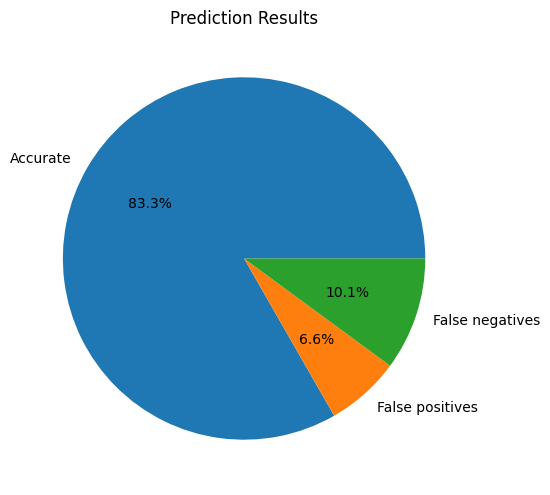

In [18]:
# Prediction accuracy pie chart
plt.figure(figsize=(6, 6))
plt.gcf().set_dpi(100)
plt.title('Prediction Results')
plt.pie([
    len(accurate),
    len(false_positives),
    len(false_negatives)
], labels=[
    'Accurate',
    'False positives',
    'False negatives'
], autopct='%.1f%%')
plt.ylabel('')
plt.show()